# Bank Customer Churn Prediction

---



In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

## Load Data

In [ ]:
# Dataset - https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction/data

In [ ]:
!pip show kaggle

Name: kaggle
Version: 1.5.16
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading dataset
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 84.9MB/s]


In [ ]:
# Unzip the dataset
!unzip bank-customer-churn-prediction.zip -d /content/

Archive:  bank-customer-churn-prediction.zip
  inflating: /content/Churn_Modelling.csv  


In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

## Data Exploration (EDA)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

## Data Preprocessing

In [ ]:
# Look for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Change the categorical features to numerical features using label encoder

columns = ['Geography', 'Gender']

label_encoder = LabelEncoder()

# Encode each selected column
for column in columns:
    if column in df.columns and df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Visualize the data

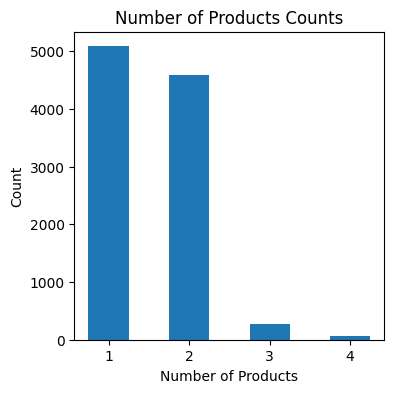

In [ ]:
# Visualize the the NumOfProducts count
plt.figure(figsize=(4,4))
plt.bar(df["NumOfProducts"].value_counts().index, df["NumOfProducts"].value_counts().values, width=0.5)
plt.xlabel("Number of Products")
plt.ylabel("Count")
plt.title("Number of Products Counts")
plt.show()

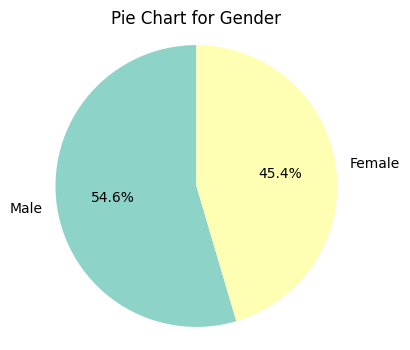

In [ ]:
# Male to Female visualizatoin using pie chart

plt.figure(figsize=(4, 4))
sns.set_palette('Set3')  # Choose a color palette
plt.pie(df["Gender"].value_counts(), labels=["Male", "Female"], autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal for a circular pie chart
plt.axis('equal')

plt.title('Pie Chart for Gender')
plt.show()

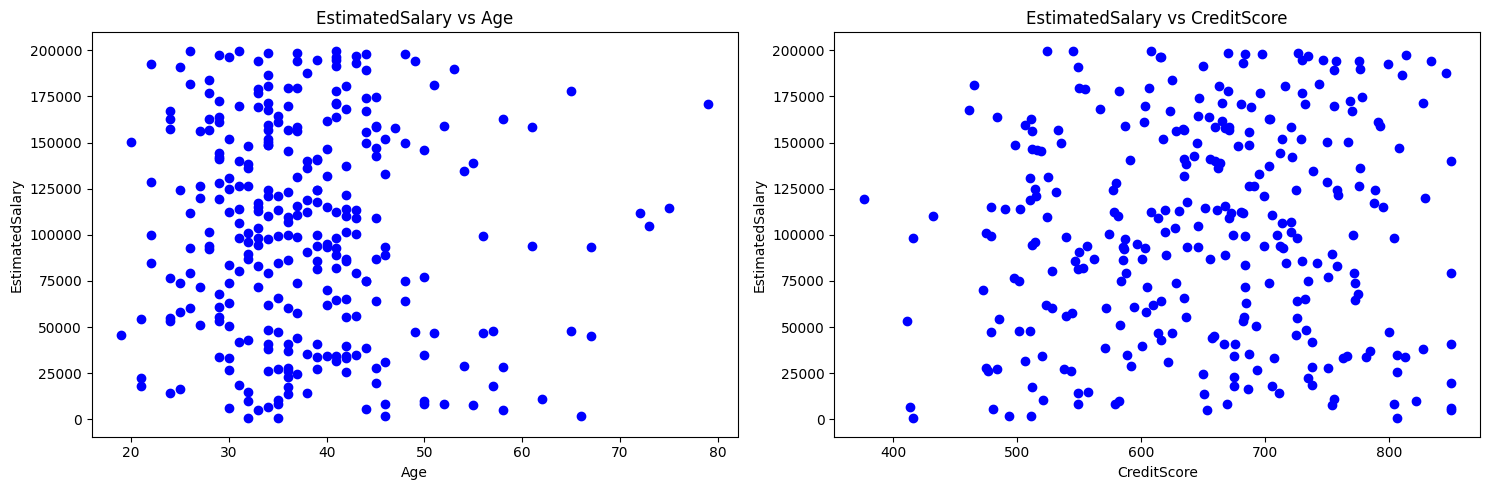

In [ ]:
# Age vs Credit score and Salary vs Credit Score
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
columns = ["Age", "CreditScore"]
for i,column in enumerate(columns):
  axes[i].scatter(df[column][:300], df["EstimatedSalary"][:300], color="blue")
  axes[i].set_title(f'EstimatedSalary vs {column}')
  axes[i].set_xlabel(column)
  axes[i].set_ylabel("EstimatedSalary")
# Adjust layout
plt.tight_layout()

plt.show()

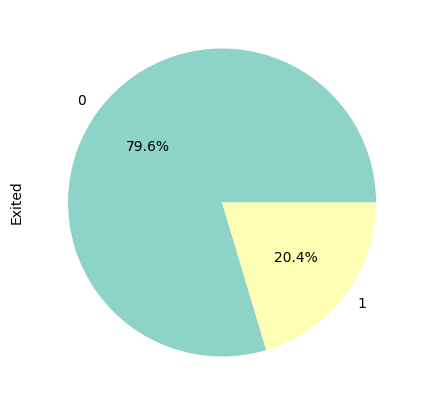

In [ ]:
#Target Distribution
plt.figure(figsize=(5,5))
palette = sns.color_palette('Set3')
explode = [0.1, 0.1]
df.groupby('Exited')['Exited'].count().plot.pie(colors=palette, autopct="%1.1f%%");

## Splitting the dataset

In [ ]:
X = df.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
y = df["Exited"]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the splitted dataset
print(f"Shape of training features(x_train): {x_train.shape}")
print(f"Shape of testing features(x_test): {x_test.shape}")
print(f"Shape of training labels(y_train): {y_train.shape}")
print(f"Shape of testing labels(y_test): {y_test.shape}")

Shape of training features(x_train): (8000, 10)
Shape of testing features(x_test): (2000, 10)
Shape of training labels(y_train): (8000,)
Shape of testing labels(y_test): (2000,)


## PCA(Principle component analysis)

In [ ]:
# List of features to scale
features_to_scale = ['Balance', 'Tenure', "Age", "CreditScore"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
x_train[features_to_scale] = scaler.fit_transform(x_train[features_to_scale])
x_test[features_to_scale] = scaler.transform(x_test[features_to_scale])

In [ ]:
x_train.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,8.000000e+03,8000.000000,8000.000000,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000
mean,5.435652e-16,0.750125,0.545250,-1.896261e-16,6.661338e-17,-3.099743e-16,1.531375,0.703500,0.512750,100431.289764
std,1.000063e+00,0.828416,0.497979,1.000063e+00,1.000063e+00,1.000063e+00,0.579705,0.456743,0.499869,57518.920431
min,-3.130418e+00,0.000000,0.000000,-1.986800e+00,-1.736467e+00,-1.218471e+00,1.000000,0.000000,0.000000,90.070000
25%,-6.916511e-01,0.000000,0.000000,-6.557859e-01,-6.953935e-01,-1.218471e+00,1.000000,0.000000,0.000000,51364.125000
50%,1.403458e-02,1.000000,1.000000,-1.804237e-01,-1.344719e-03,3.257497e-01,1.000000,1.000000,1.000000,100487.720000
75%,6.989648e-01,1.000000,1.000000,4.850833e-01,6.927040e-01,8.247131e-01,2.000000,1.000000,1.000000,149595.842500
max,2.058448e+00,2.000000,1.000000,5.048560e+00,1.733777e+00,2.798656e+00,4.000000,1.000000,1.000000,199970.740000


In [ ]:
x_test.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.058054,0.731000,0.547500,0.011432,0.015486,0.030721,1.525500,0.713500,0.524500,98726.040350
std,1.013795,0.824002,0.497863,0.985362,1.018057,0.994830,0.589511,0.452239,0.499524,57470.903307
min,-3.130418,0.000000,0.000000,-1.986800,-1.736467,-1.218471,1.000000,0.000000,0.000000,11.580000
25%,-0.764295,0.000000,0.000000,-0.655786,-1.042418,-1.218471,1.000000,0.000000,0.000000,49712.365000
50%,-0.053421,0.000000,1.000000,-0.085351,-0.001345,0.379370,1.000000,1.000000,1.000000,98511.730000
75%,0.628915,1.000000,1.000000,0.485083,1.039728,0.828889,2.000000,1.000000,1.000000,147317.217500
max,2.058448,2.000000,1.000000,5.048560,1.733777,2.241662,4.000000,1.000000,1.000000,199992.480000


## RandomForestClassifier

### Model Training

In [ ]:
# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(x_test)

In [ ]:
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0])

### Evaluation

In [ ]:
# Evaluate our model using classification_report
class_report_rf = classification_report(y_test, y_pred_rf)

In [ ]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy for RFC: {accuracy_rf*100:.2f}%")

Accuracy for RFC: 86.45%


In [ ]:
print(class_report_rf)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

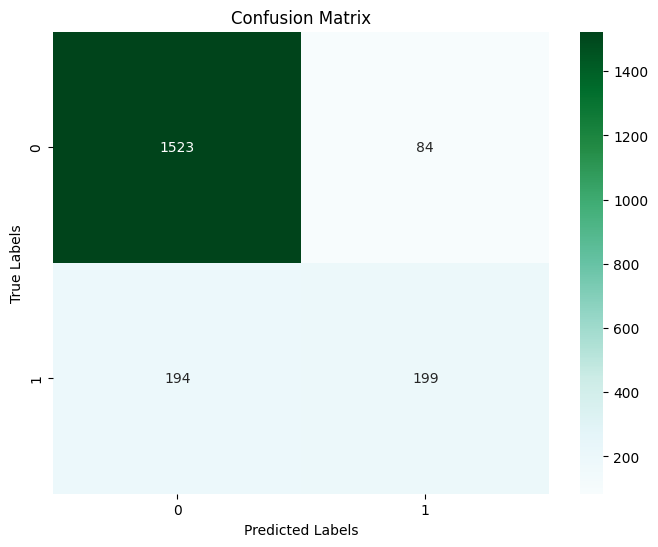

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="BuGn", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Predict some values

In [ ]:
# Sample entry with placeholder values
sample_entry = np.array([700, 3, 1, 35, 5, 100000, 2, 1, 1, 80000])

In [ ]:
# Reshape the sample entry to be a 2D array
sample_entry_2d = sample_entry.reshape(1, -1)

# Make a prediction using the reshaped array
prediction = rf_model.predict(sample_entry_2d)
prediction_labels = {0: "Will not Exit",
                     1: "Will Exit"}
# Print the prediction
print(f"Predicted Class: {prediction} {prediction_labels[prediction[0]]}")

Predicted Class: [0] Will not Exit


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## LogisticRegression

In [ ]:
# Create a Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Making predictions on the test set
y_pred_log = log_reg.predict(x_test)

In [ ]:
# Evaluating the model
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
classification_rep_log = classification_report(y_test, y_pred_log)

# Displaying results
print(f"Accuracy for LogReg: {accuracy_log*100:.2f}%")
print("Confusion Matrix LogReg:\n", conf_matrix_log)
print("Classification Report for LogRog:\n", classification_rep_log)

Accuracy for LogReg: 80.35%
Confusion Matrix LogReg:
 [[1607    0]
 [ 393    0]]
Classification Report for LogRog:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


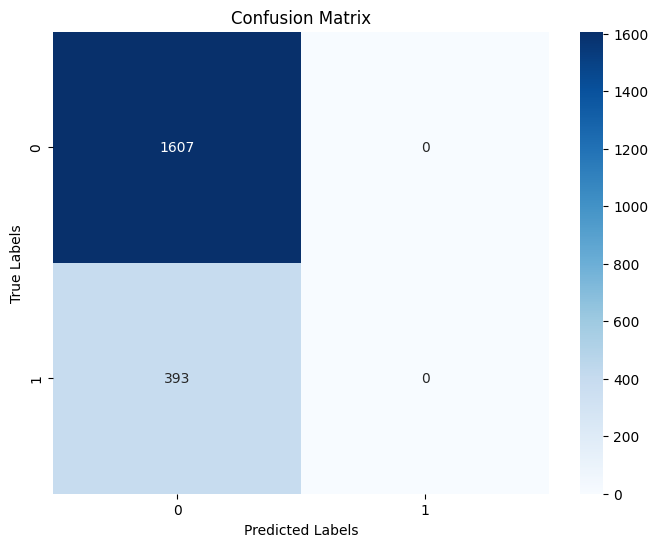

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Predict on some random values

# Sample entry with placeholder values
sample_entry = np.array([700, 3, 1, 35, 5, 100000, 2, 1, 1, 80000])

# Reshape the sample entry to be a 2D array
sample_entry_2d = sample_entry.reshape(1, -1)

# Make a prediction using the reshaped array
prediction = rf_model.predict(sample_entry_2d)
prediction_labels = {0: "Will not Exit",
                     1: "Will Exit"}
# Print the prediction
print(f"Predicted Class: {prediction} {prediction_labels[prediction[0]]}")

Predicted Class: [0] Will not Exit


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## XGboost

In [ ]:
# Creating and training the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Making predictions on the test set
y_pred_xgb = xgb_model.predict(x_test)

In [ ]:
# Evaluating the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Displaying results
print(f"Accuracy for XGB: {accuracy_xgb*100:.2f}%")
print("Confusion Matrix for XGB:\n", conf_matrix_xgb)
print("Classification Report XGB:\n", classification_rep_xgb)

Accuracy for XGB: 86.10%
Confusion Matrix for XGB:
 [[1523   84]
 [ 194  199]]
Classification Report XGB:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



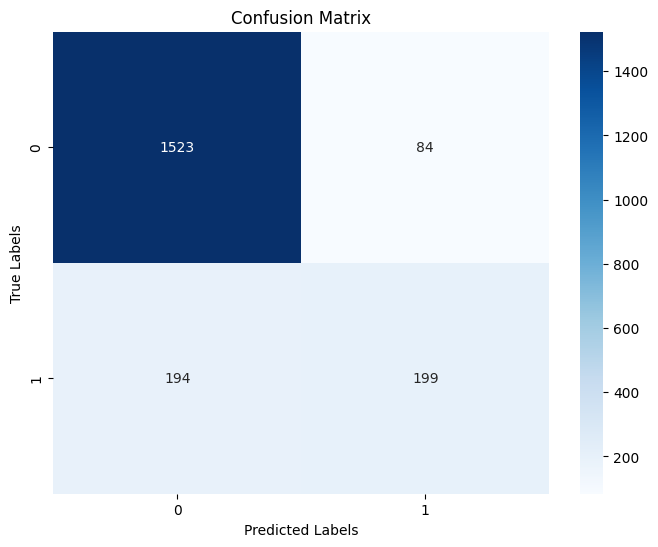

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Predict on random values

# Sample entry with placeholder values
sample_entry = np.array([700, 3, 1, 35, 5, 100000, 2, 1, 1, 80000])

# Reshape the sample entry to be a 2D array
sample_entry_2d = sample_entry.reshape(1, -1)

# Make a prediction using the reshaped array
prediction = rf_model.predict(sample_entry_2d)
prediction_labels = {0: "Will not Exit",
                     1: "Will Exit"}
# Print the prediction
print(f"Predicted Class: {prediction} {prediction_labels[prediction[0]]}")

Predicted Class: [0] Will not Exit


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
